###  This notebook reads in the Richmond area CSV files and prepares a single data set for the ML routines
The files contain Richmond area weather stations data from 1998 to 2018, SPI and SPEI (hydrological) 
data from 2010 to 2018, and the pollen data from 1988 to 2018 to generate a file with 
"weather features" and the "target" of total pollen

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd
%matplotlib inline

In [5]:
# Import Pollen csv file
df = pd.read_csv('pollen_Richmond_30yr.csv', index_col=['Date'], parse_dates=['Date'])
# df = pd.read_csv('pollen_Richmond_30yr.csv')
df.columns

Index(['Tree', 'Mold', 'Grass', 'Ragweed'], dtype='object')

In [6]:
print(f"{df.head()}")

            Tree  Mold  Grass  Ragweed
Date                                  
1988-03-15  10.0   0.0    0.0      0.0
1988-03-16   0.0   0.0    0.0      0.0
1988-03-17   2.0   0.0    0.0      0.0
1988-03-18   2.0   0.0    0.0      0.0
1988-03-22   2.0   0.0    0.0      0.0


In [7]:
df.describe()

,Tree,Mold,Grass,Ragweed
count,5497.000000,5497.000000,5497.000000,5496.000000
mean,121.192703,3341.025105,3.451646,2.846234
std,402.350849,3093.422566,15.711649,11.252678
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,720.000000,0.000000,0.000000
50%,0.000000,2610.000000,0.000000,0.000000
75%,26.000000,5040.000000,0.000000,0.000000
max,5200.000000,27900.000000,497.000000,208.000000


In [8]:
df.count()

Tree       5497
Mold       5497
Grass      5497
Ragweed    5496
dtype: int64

In [9]:
print(df.dtypes)

Tree       float64
Mold       float64
Grass      float64
Ragweed    float64
dtype: object


In [10]:
dtg = pd.to_datetime(df.index)
print(dtg[0:5])

DatetimeIndex(['1988-03-15', '1988-03-16', '1988-03-17', '1988-03-18',
               '1988-03-22'],
              dtype='datetime64[ns]', name='Date', freq=None)


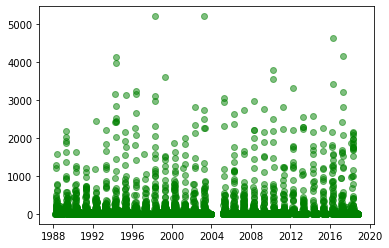

In [11]:
# Add the pollen types together for a "total pollen count".  Exclude mold spores at this time.

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

total_pollen = df["Tree"] + df["Grass"] + df["Ragweed"]
plt.scatter(dtg, total_pollen, c="g", alpha=0.5, marker='o')
plt.show()

In [12]:
# Add the total pollen count to the DataFrame
df["total-pol"] = total_pollen
df.columns

Index(['Tree', 'Mold', 'Grass', 'Ragweed', 'total-pol'], dtype='object')

y_values max is: 5200.0
y_values max is: 27900.0
y_values max is: 497.0
y_values max is: 208.0


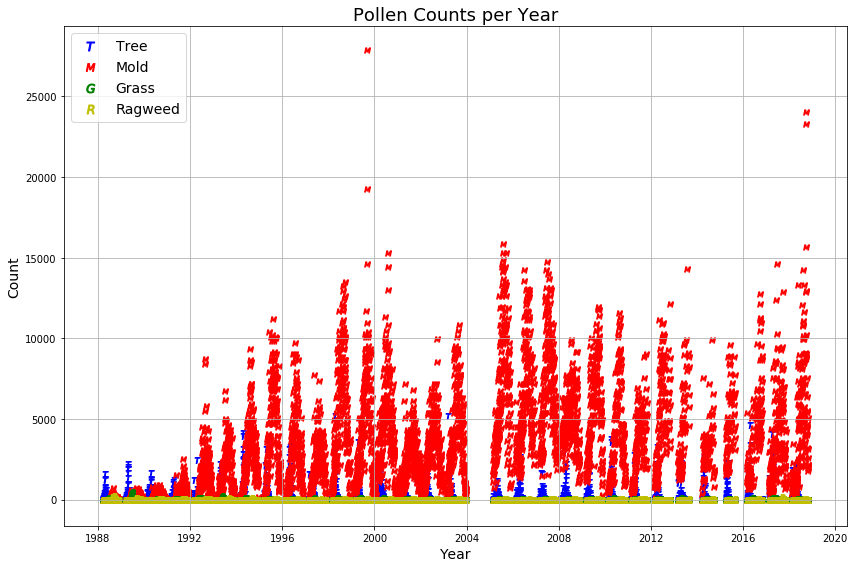

In [17]:
# Initialize the plotting parameters for the graph of each allergen

plt.figure(figsize=(12,8))
plt.title('Pollen Counts per Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid()

# # Make our own markers using first letter of each drug
# # enclosed in dollar signs to indicate a string

markers = ["$T$", "$M$", "$G$", "$R$"]
mkr = 0

colors = ['b','r','g','y']

# Compute the xvalues and yvalues as (timeindex, column values by column name)

#print(xval)

colnames = df.columns

# print(f"{colnames[0]}")


for a in colnames[0:4]:
    x_values = dtg
    y_values = df[a]
    print(f"y_values max is: {y_values.max()}")

    plt.scatter(x_values, y_values,
                 marker = markers[mkr], color=colors[mkr])
    mkr = mkr + 1
    
leg = plt.legend(colnames, markerscale=1.5, fontsize=14) 


# Save the Figure
plt.tight_layout()
# plt.savefig("./test.pdf")

plt.show()

In [19]:
# Need to match time intervals to the shortest length of record (SPI)
df_2010 = df[df.index > "2009-12-31"]
dfdtg_2010 = pd.to_datetime(df_2010.index)
df_2010.tail()
print(len(df_2010), df_2010.head())

1250             Tree   Mold  Grass  Ragweed  total-pol
Date                                              
2010-02-22   0.0  630.0    0.0      0.0        0.0
2010-02-23   0.0  450.0    0.0      0.0        0.0
2010-02-24   0.0  675.0    0.0      0.0        0.0
2010-02-25   0.0  765.0    0.0      0.0        0.0
2010-03-02   0.0  420.0    0.0      0.0        0.0


In [20]:
# Import Richmond area csv file for weather at local weather stations

df2 = pd.read_csv('Wx_Richmond_1998.csv', index_col=['DATE'], parse_dates=['DATE'])
df2.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'AWND', 'DAPR',
       'MDPR', 'PRCP', 'TAVG', 'TMAX', 'TMIN', 'TOBS', 'TSUN', 'WDF2', 'WESD',
       'WESF', 'WV03'],
      dtype='object')

In [15]:
print(f"{df2.head()}")

                STATION            NAME  LATITUDE  LONGITUDE  ELEVATION  AWND  \
DATE                                                                            
1998-01-01  USC00440327  ASHLAND, VA US     37.75   -77.4833       67.1   NaN   
1998-01-02  USC00440327  ASHLAND, VA US     37.75   -77.4833       67.1   NaN   
1998-01-03  USC00440327  ASHLAND, VA US     37.75   -77.4833       67.1   NaN   
1998-01-04  USC00440327  ASHLAND, VA US     37.75   -77.4833       67.1   NaN   
1998-01-05  USC00440327  ASHLAND, VA US     37.75   -77.4833       67.1   NaN   

            DAPR  MDPR  PRCP  TAVG  TMAX  TMIN  TOBS  TSUN  WDF2  WESD  WESF  \
DATE                                                                           
1998-01-01   NaN   NaN   0.0   NaN  37.0  12.0  30.0   NaN   NaN   NaN   NaN   
1998-01-02   NaN   NaN   0.0   NaN  60.0  30.0  45.0   NaN   NaN   NaN   NaN   
1998-01-03   NaN   NaN   0.0   NaN  64.0  38.0  50.0   NaN   NaN   NaN   NaN   
1998-01-04   NaN   NaN   0.0   N

In [21]:
df2.count()

STATION      56520
NAME         56520
LATITUDE     56520
LONGITUDE    56520
ELEVATION    56520
AWND         15903
DAPR           535
MDPR           537
PRCP         55573
TAVG          7749
TMAX         29070
TMIN         29076
TOBS         13110
TSUN          1336
WDF2         15906
WESD          5293
WESF           579
WV03             2
dtype: int64

In [22]:
dtg2 = pd.to_datetime(df2.index)

18.0


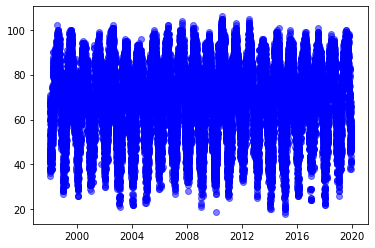

In [23]:
print(df2.TMAX.min())
plt.scatter(dtg2, df2.TMAX, c="b", alpha=0.5, marker='o')
plt.show()

In [24]:
rows = len(df2)
print(rows)

56520


### There are many incomplete records. 
Only keep rows where there is a TMAX and TMIN, so that TAVG can be computed in each cell and we drop most incomplete
records

In [25]:
df2_reduced = df2[df2.TMAX > 0]
dtg2_reduced = pd.to_datetime(df2_reduced.index)
print(len(df2_reduced))

29070


In [21]:
df2_reduced.head(20)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,AWND,DAPR,MDPR,PRCP,TAVG,TMAX,TMIN,TOBS,TSUN,WDF2,WESD,WESF,WV03
DATE,,,,,,,,,,,,,,,,,,
1998-01-01,USC00440327,"ASHLAND, VA US",37.75,-77.4833,67.1,NaN,NaN,NaN,0.00,NaN,37.0,12.0,30.0,NaN,NaN,NaN,NaN,NaN
1998-01-02,USC00440327,"ASHLAND, VA US",37.75,-77.4833,67.1,NaN,NaN,NaN,0.00,NaN,60.0,30.0,45.0,NaN,NaN,NaN,NaN,NaN
1998-01-03,USC00440327,"ASHLAND, VA US",37.75,-77.4833,67.1,NaN,NaN,NaN,0.00,NaN,64.0,38.0,50.0,NaN,NaN,NaN,NaN,NaN
1998-01-04,USC00440327,"ASHLAND, VA US",37.75,-77.4833,67.1,NaN,NaN,NaN,0.00,NaN,65.0,39.0,50.0,NaN,NaN,NaN,NaN,NaN
1998-01-05,USC00440327,"ASHLAND, VA US",37.75,-77.4833,67.1,NaN,NaN,NaN,0.00,NaN,68.0,36.0,55.0,NaN,NaN,NaN,NaN,NaN
1998-01-06,USC00440327,"ASHLAND, VA US",37.75,-77.4833,67.1,NaN,NaN,NaN,0.00,NaN,66.0,49.0,60.0,NaN,NaN,NaN,NaN,NaN
1998-01-07,USC00440327,"ASHLAND, VA US",37.75,-77.4833,67.1,NaN,NaN,NaN,0.12,NaN,67.0,57.0,65.0,NaN,NaN,NaN,NaN,NaN
1998-01-08,USC00440327,"ASHLAND, VA US",37.75,-77.4833,67.1,NaN,NaN,NaN,0.62,NaN,70.0,63.0,63.0,NaN,NaN,NaN,NaN,NaN
1998-01-09,USC00440327,"ASHLAND, VA US",37.75,-77.4833,67.1,NaN,NaN,NaN,0.00,NaN,63.0,45.0,45.0,NaN,NaN,NaN,NaN,NaN


In [28]:
# Recompute TAVG from TMAX and TMIN to fill the column
tavg = (df2_reduced.TMAX + df2_reduced.TMIN) / 2

df2_reduced.TAVG = tavg

print(df2_reduced.head())

                STATION            NAME  LATITUDE  LONGITUDE  ELEVATION  AWND  \
DATE                                                                            
1998-01-01  USC00440327  ASHLAND, VA US     37.75   -77.4833       67.1   NaN   
1998-01-02  USC00440327  ASHLAND, VA US     37.75   -77.4833       67.1   NaN   
1998-01-03  USC00440327  ASHLAND, VA US     37.75   -77.4833       67.1   NaN   
1998-01-04  USC00440327  ASHLAND, VA US     37.75   -77.4833       67.1   NaN   
1998-01-05  USC00440327  ASHLAND, VA US     37.75   -77.4833       67.1   NaN   

            DAPR  MDPR  PRCP  TAVG  TMAX  TMIN  TOBS  TSUN  WDF2  WESD  WESF  \
DATE                                                                           
1998-01-01   NaN   NaN   0.0  24.5  37.0  12.0  30.0   NaN   NaN   NaN   NaN   
1998-01-02   NaN   NaN   0.0  45.0  60.0  30.0  45.0   NaN   NaN   NaN   NaN   
1998-01-03   NaN   NaN   0.0  51.0  64.0  38.0  50.0   NaN   NaN   NaN   NaN   
1998-01-04   NaN   NaN   0.0  52

Index(['TMAX', 'TMIN'], dtype='object')
y_values max is: 106.0
y_values max is: 92.0


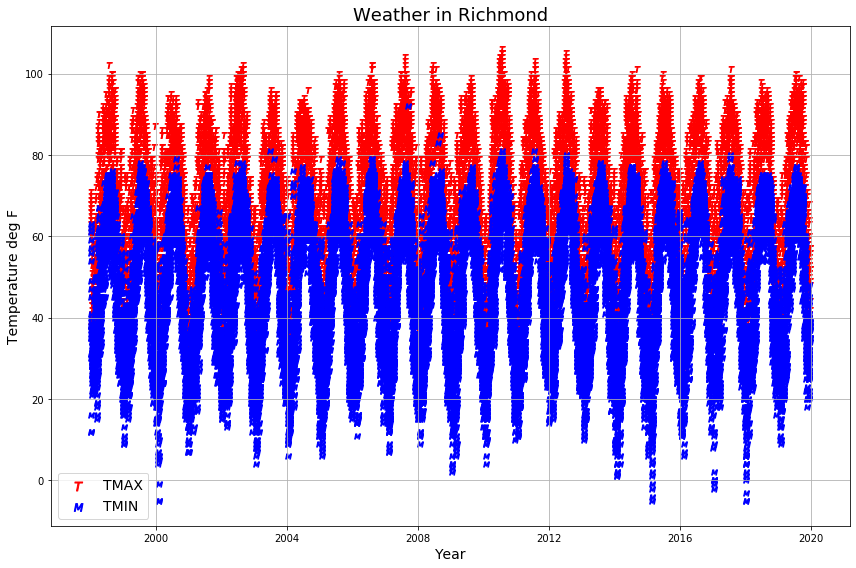

In [29]:
# Initialize the plotting parameters for the graph

plt.figure(figsize=(12,8))
plt.title('Weather in Richmond', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Temperature deg F', fontsize=14)
plt.grid()

# # Make our own markers using first letter of each drug
# # enclosed in dollar signs to indicate a string

markers = ["$T$", "$M$", "$G$", "$R$"]
mkr = 0

colors = ['r','b','g','y']

# Compute the xvalues and yvalues as (timeindex, column values by column name)

#print(xval)

colnames = df2_reduced.columns[10:12]

print(f"{colnames}")

for a in colnames:
    x_values = dtg2_reduced
    y_values = df2_reduced[a]
    print(f"y_values max is: {y_values.max()}")
#     plt.scatter(x_values, y_values, c="b", alpha=0.5, marker='o')
    plt.scatter(x_values, y_values,
                 marker = markers[mkr], color=colors[mkr])
    mkr = mkr + 1

# plt.scatter(dtg2_reduced, df2_reduced.TAVG, marker='o', color='g')
leg = plt.legend(colnames, markerscale=1.5, fontsize=14) 


# Save the Figure
plt.tight_layout()
plt.savefig("./wx_in_richmond.png")

plt.show()

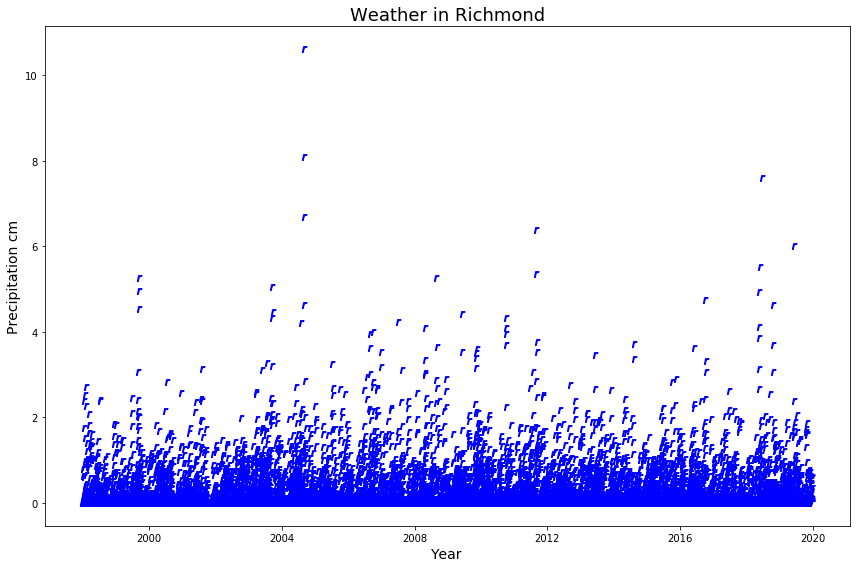

In [36]:
# Plot precip and wind speed to evaluate coverage and scale
# Initialize the plotting parameters for the graph

plt.figure(figsize=(12,8))
plt.title('Weather in Richmond', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Precipitation cm', fontsize=14)
plt.scatter(dtg2_reduced, df2_reduced.PRCP, marker='$r$', color='b')
plt.tight_layout()

plt.savefig('./rain_richmond.png')
plt.show()


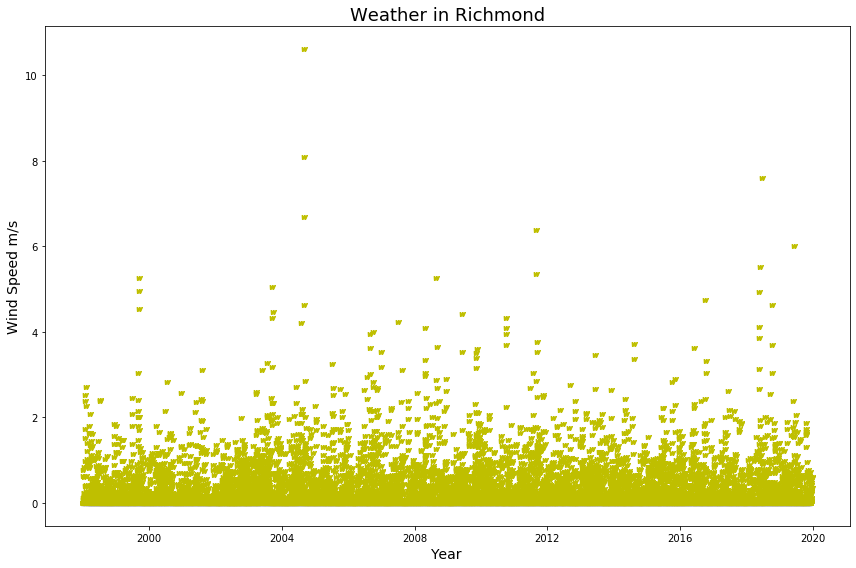

In [23]:
# Plot precip and wind speed to evaluate coverage and scale
# Initialize the plotting parameters for the graph

plt.figure(figsize=(12,8))
plt.title('Weather in Richmond', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Wind Speed m/s', fontsize=14)
plt.scatter(dtg2_reduced, df2_reduced.PRCP, marker='$w$', color='y')
plt.tight_layout()

#plt.savefig('./wind.pdf')
plt.show()


In [30]:
# How many unique locations are there for the weather stations after reducing for complete records?
stns = df2_reduced.NAME.unique()
lats = df2_reduced.LATITUDE.unique()
lons = df2_reduced.LONGITUDE.unique()
print(f"Name and location of individual weather stations in the set: \n {stns}  {lats}  {lons} ")

d = {'station': stns, 'lat': lats, 'lon': lons}
stations_df = pd.DataFrame(data=d)
stations_df

Name and location of individual weather stations in the set: 
 ['ASHLAND, VA US' 'SANDSTON, VA US'
 'RICHMOND INTERNATIONAL AIRPORT, VA US'
 'ASHLAND HANOVER CO MUNICIPAL AIRPORT, VA US']  [37.75    37.54417 37.51151 37.70806]  [-77.4833  -77.27583 -77.32344 -77.43444] 


,station,lat,lon
0,"ASHLAND, VA US",37.75000,-77.48330
1,"SANDSTON, VA US",37.54417,-77.27583
2,"RICHMOND INTERNATIONAL AIRPORT, VA US",37.51151,-77.32344
3,"ASHLAND HANOVER CO MUNICIPAL AIRPORT, VA US",37.70806,-77.43444


In [31]:
# We want to group the measurements by date and average the measurements for each day and location.
df2_groupbydate = df2_reduced.groupby("DATE").mean()
df2grp = pd.DataFrame(df2_groupbydate)
dtg4= pd.to_datetime(df2grp.index) 
df2grp.head(20)

,LATITUDE,LONGITUDE,ELEVATION,AWND,DAPR,MDPR,PRCP,TAVG,TMAX,TMIN,TOBS,TSUN,WDF2,WESD,WESF,WV03
DATE,,,,,,,,,,,,,,,,
1998-01-01,37.656523,-77.413727,59.866667,8.50,NaN,NaN,0.000,25.500000,37.666667,13.333333,30.0,NaN,210.0,0.0,NaN,NaN
1998-01-02,37.656523,-77.413727,59.866667,10.74,NaN,NaN,0.000,46.166667,60.333333,32.000000,45.0,NaN,210.0,0.0,NaN,NaN
1998-01-03,37.656523,-77.413727,59.866667,10.51,NaN,NaN,0.000,50.166667,64.000000,36.333333,50.0,NaN,240.0,0.0,NaN,NaN
1998-01-04,37.656523,-77.413727,59.866667,4.03,NaN,NaN,0.000,51.833333,65.666667,38.000000,50.0,NaN,200.0,0.0,NaN,NaN
1998-01-05,37.656523,-77.413727,59.866667,5.37,NaN,NaN,0.000,52.500000,68.666667,36.333333,55.0,NaN,190.0,0.0,NaN,NaN
1998-01-06,37.656523,-77.413727,59.866667,6.49,NaN,NaN,0.000,60.000000,67.000000,53.000000,60.0,NaN,180.0,0.0,NaN,NaN
1998-01-07,37.656523,-77.413727,59.866667,10.29,NaN,NaN,0.095,63.333333,67.666667,59.000000,65.0,NaN,160.0,0.0,NaN,NaN
1998-01-08,37.630755,-77.403370,58.550000,14.54,NaN,NaN,0.700,66.500000,70.500000,62.500000,63.0,NaN,230.0,0.0,NaN,NaN
1998-01-09,37.656523,-77.413727,59.866667,14.99,NaN,NaN,0.000,53.666667,63.000000,44.333333,45.0,NaN,230.0,0.0,NaN,NaN


In [32]:
print(len(df2grp))

8021


In [33]:
# Need to match time intervals to the shortest length of record (SPI)
df2grp_2010 = df2grp[df2grp.index > "2009-12-31"]
df2dtg_2010 = pd.to_datetime(df2grp_2010.index)
df2grp_2010.tail()
print(len(df2grp_2010))

3638


Index(['TMAX', 'TMIN'], dtype='object')
y_values max is: 104.25
y_values max is: 78.5


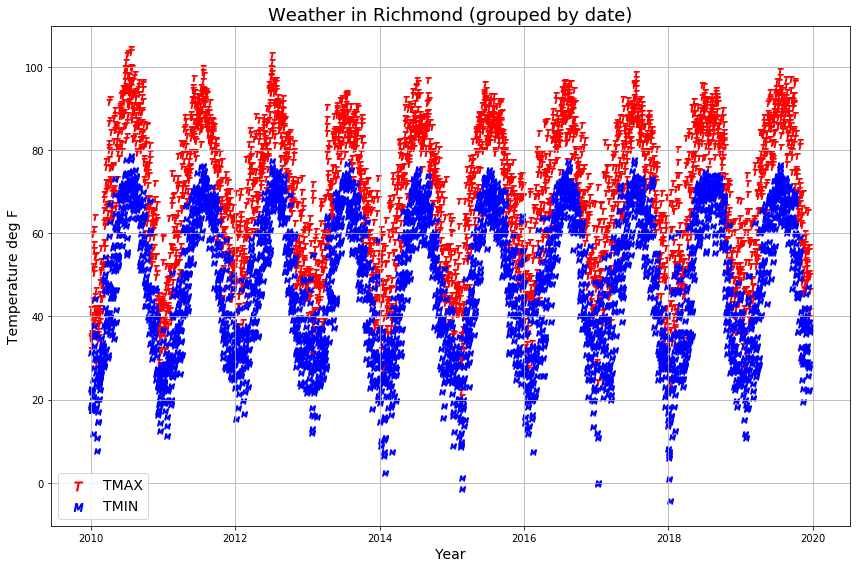

In [34]:
plt.figure(figsize=(12,8))
plt.title('Weather in Richmond (grouped by date)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Temperature deg F', fontsize=14)
plt.grid()

# # Make our own markers using first letter of each drug
# # enclosed in dollar signs to indicate a string

markers = ["$T$", "$M$", "$G$", "$R$"]
mkr = 0

colors = ['r','b','g','y']

# Compute the xvalues and yvalues as (timeindex, column values by column name)

#print(xval)

colnames = df2grp_2010.columns[8:10]

print(f"{colnames}")

for a in colnames:
    x_values = df2dtg_2010
    y_values = df2grp_2010[a]
    print(f"y_values max is: {y_values.max()}")
#     plt.scatter(x_values, y_values, c="b", alpha=0.5, marker='o')
    plt.scatter(x_values, y_values,
                 marker = markers[mkr], color=colors[mkr])
    mkr = mkr + 1

# plt.scatter(dtg2_reduced, df2_reduced.TAVG, marker='o', color='g')
leg = plt.legend(colnames, markerscale=1.5, fontsize=14) 


# Save the Figure
plt.tight_layout()
# plt.savefig("./test.pdf")

plt.show()

In [35]:
# Dependencies and Setup
import gmaps

# Google developer API key
from api_keys import api_key

gmaps.configure(api_key)

In [36]:
# Plot stations on a map to see distribution and locations to show the small sample size
    
figure_layout = {
    
    'width': '800px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)

locations = stations_df[["lat", "lon"]]

stations_layer = gmaps.symbol_layer(
    locations, fill_color="green", stroke_color="green", scale=5 )

fig.add_layer(stations_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…

### Use the SPI values as a proxy for direct measure of soil moisture
The Standardized Precipitation Index (SPI) is a widely used index to characterize meteorological drought on a 
range of timescales. On short timescales, the SPI is closely related to soil moisture, while at longer timescales, 
the SPI can be related to groundwater and reservoir storage.

441


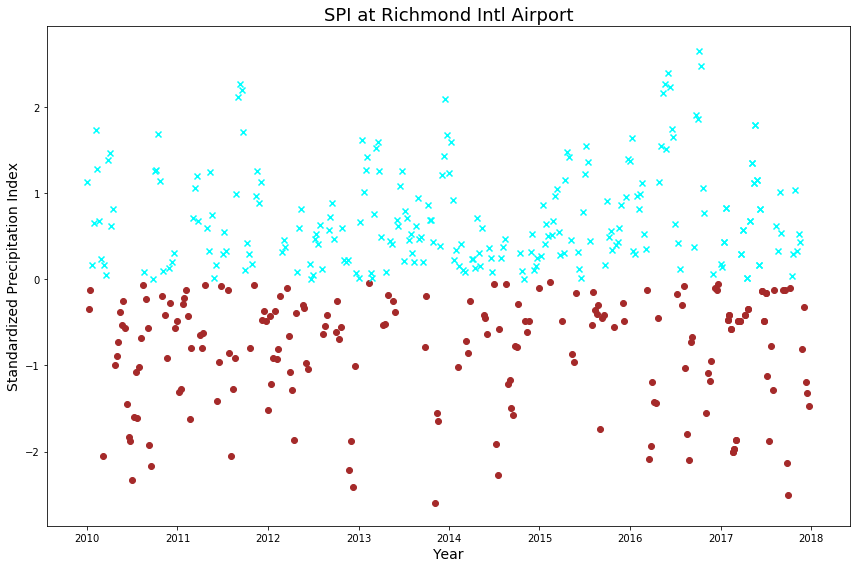

In [37]:
# Import SPI csv file
df3 = pd.read_csv('SPI_Richmond_2010.csv', header=0, parse_dates=['Date'], index_col='Date', squeeze=True)
print(len(df3))
dtg3 = pd.to_datetime(df3.index)
# df = pd.read_csv('pollen_Richmond_30yr.csv')
# df3.plot()
# plt.show()

plt.figure(figsize=(12,8))
plt.title('SPI at Richmond Intl Airport', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Standardized Precipitation Index', fontsize=14)

df3_neg = df3[df3 <0]
dtgn = pd.to_datetime(df3_neg.index)
df3_pos = df3[df3 >= 0]
dtgp = pd.to_datetime(df3_pos.index)
plt.scatter(dtgn, df3_neg, marker='o', c='brown')
plt.scatter(dtgp, df3_pos, marker='x', c='cyan')
plt.tight_layout()

plt.savefig('./SPI_richmond.png')
plt.show()


In [38]:
print(f"{df3.head()}")

Date
2017-12-24   -1.47
2017-12-17   -1.32
2017-12-10   -1.19
2017-12-03   -0.32
2017-11-26   -0.81
Name: SPI, dtype: float64


In [39]:
df3.describe()

count    441.000000
mean       0.031270
std        0.978958
min       -2.590000
25%       -0.520000
50%        0.110000
75%        0.630000
max        2.650000
Name: SPI, dtype: float64

In [40]:
# plt.figure(figsize=(12,10))
# plt.title('SPI at Richmond International Airport', fontsize=18)
# plt.xlabel('Year', fontsize=14)
# plt.ylabel('Standardized Precipitation Index', fontsize=14)
# plt.grid()

# xvalues = dtg3
# yvalues = df3.SPI

# plt.plot(xvalues, yvalues, marker='o')

In [41]:
# Upsample the SPI to a daily frequency to match with the pollen data
# Remove duplicates from the data set
df3[df3.index.duplicated()]

df3 = df3[~df3.index.duplicated()]

# df3[df3.index.duplicated()]

upsampled = df3.resample('D')

interpolated = upsampled.interpolate(method='linear')

In [42]:
print(interpolated.head(32))

Date
2010-01-01    1.130000
2010-01-02    0.918571
2010-01-03    0.707143
2010-01-04    0.495714
2010-01-05    0.284286
2010-01-06    0.072857
2010-01-07   -0.138571
2010-01-08   -0.350000
2010-01-09   -0.318571
2010-01-10   -0.287143
2010-01-11   -0.255714
2010-01-12   -0.224286
2010-01-13   -0.192857
2010-01-14   -0.161429
2010-01-15   -0.130000
2010-01-16   -0.088571
2010-01-17   -0.047143
2010-01-18   -0.005714
2010-01-19    0.035714
2010-01-20    0.077143
2010-01-21    0.118571
2010-01-22    0.160000
2010-01-23    0.230000
2010-01-24    0.300000
2010-01-25    0.370000
2010-01-26    0.440000
2010-01-27    0.510000
2010-01-28    0.580000
2010-01-29    0.650000
2010-01-30    0.804286
2010-01-31    0.958571
2010-02-01    1.112857
Freq: D, Name: SPI, dtype: float64


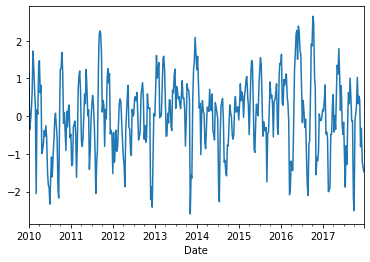

In [43]:
interpolated.plot()
plt.show()

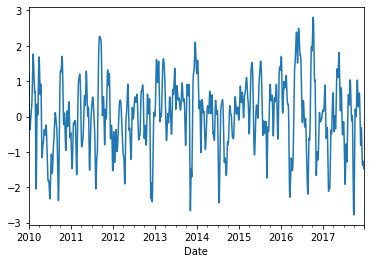

In [44]:
interpolated = upsampled.interpolate(method='spline', axis=0, s=0, order=3)
interpolated.plot()
plt.show()

In [45]:
# Cubic spline fit is kept as the final DataFrame for the interpolated SPI values
df3 = pd.DataFrame(interpolated)
df3.head()

,SPI
Date,
2010-01-01,1.130000
2010-01-02,0.738034
2010-01-03,0.416050
2010-01-04,0.158165
2010-01-05,-0.041501


In [46]:
print(len(df3))

2915


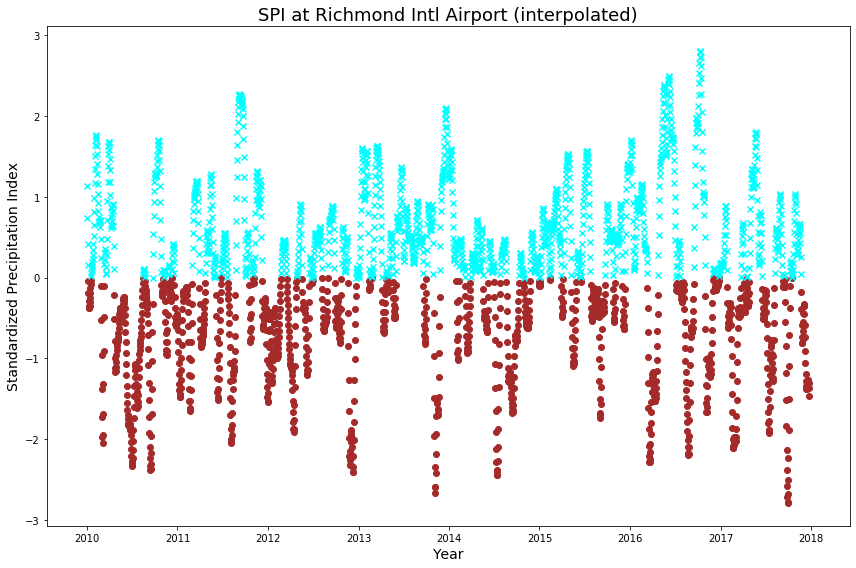

In [47]:
plt.figure(figsize=(12,8))
plt.title('SPI at Richmond Intl Airport (interpolated)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Standardized Precipitation Index', fontsize=14)

df3_neg = df3[df3 <0]
dtgn = pd.to_datetime(df3_neg.index)
df3_pos = df3[df3 >= 0]
dtgp = pd.to_datetime(df3_pos.index)
plt.scatter(dtgn, df3_neg, marker='o', c='brown')
plt.scatter(dtgp, df3_pos, marker='x', c='cyan')
plt.tight_layout()

plt.savefig('./SPI_interpolated.png')
plt.show()


###  Now need to merge the "features" with the "target" on common dates
Use the shortest dataframe as the basis, since all cells must be filled in order to use sklearn ML routines

In [48]:
# First merge the pollen and SPI files
first_merge = pd.merge(df_2010, df3, on="Date", how='inner')
first_merge.head()

,Tree,Mold,Grass,Ragweed,total-pol,SPI
Date,,,,,,
2010-02-22,0.0,630.0,0.0,0.0,0.0,0.716795
2010-02-23,0.0,450.0,0.0,0.0,0.0,0.696697
2010-02-24,0.0,675.0,0.0,0.0,0.0,0.624785
2010-02-25,0.0,765.0,0.0,0.0,0.0,0.479679
2010-03-02,0.0,420.0,0.0,0.0,0.0,-1.377089


In [49]:
print(len(first_merge))

1061


In [50]:
df2grp_2010.head()

,LATITUDE,LONGITUDE,ELEVATION,AWND,DAPR,MDPR,PRCP,TAVG,TMAX,TMIN,TOBS,TSUN,WDF2,WESD,WESF,WV03
DATE,,,,,,,,,,,,,,,,
2010-01-01,37.628435,-77.379253,57.475,4.360,NaN,NaN,0.0175,36.500,41.75,31.25,37.5,NaN,165.0,0.0,NaN,NaN
2010-01-02,37.628435,-77.379253,57.475,13.535,NaN,NaN,0.0150,28.875,35.25,22.50,25.5,NaN,310.0,0.0,NaN,NaN
2010-01-03,37.628435,-77.379253,57.475,13.980,NaN,NaN,0.0000,25.125,32.00,18.25,23.0,NaN,300.0,0.0,NaN,NaN
2010-01-04,37.628435,-77.379253,57.475,7.605,NaN,NaN,0.0000,26.750,34.75,18.75,23.5,NaN,300.0,0.0,NaN,NaN
2010-01-05,37.628435,-77.379253,57.475,7.495,NaN,NaN,0.0000,27.250,35.75,18.75,31.0,NaN,320.0,0.0,NaN,NaN


In [51]:
# Now merge the weather data
second_merge = pd.merge(first_merge, df2grp_2010, left_index=True,
                        right_index=True, how='inner')
second_merge.head(20)

,Tree,Mold,Grass,Ragweed,total-pol,SPI,LATITUDE,LONGITUDE,ELEVATION,AWND,...,PRCP,TAVG,TMAX,TMIN,TOBS,TSUN,WDF2,WESD,WESF,WV03
2010-02-22,0.0,630.0,0.0,0.0,0.0,0.716795,37.628435,-77.379253,57.475,3.580,...,0.1175,41.500,53.25,29.75,36.5,NaN,180.0,0.0,NaN,NaN
2010-02-23,0.0,450.0,0.0,0.0,0.0,0.696697,37.628435,-77.379253,57.475,7.380,...,0.0775,42.750,50.75,34.75,40.5,NaN,155.0,0.0,NaN,NaN
2010-02-24,0.0,675.0,0.0,0.0,0.0,0.624785,37.628435,-77.379253,57.475,2.125,...,0.0825,38.250,44.25,32.25,35.0,NaN,10.0,0.0,NaN,NaN
2010-02-25,0.0,765.0,0.0,0.0,0.0,0.479679,37.628435,-77.379253,57.475,12.640,...,0.0500,38.000,44.25,31.75,36.0,NaN,305.0,0.0,NaN,NaN
2010-03-02,0.0,420.0,0.0,0.0,0.0,-1.377089,37.628435,-77.379253,57.475,5.145,...,0.1250,39.500,46.25,32.75,33.5,NaN,190.0,0.0,NaN,NaN
2010-03-03,0.0,450.0,0.0,0.0,0.0,-1.728890,37.628435,-77.379253,57.475,9.505,...,0.1600,37.125,41.25,33.00,36.5,NaN,355.0,0.0,NaN,NaN
2010-03-04,0.0,720.0,0.0,0.0,0.0,-1.968410,37.628435,-77.379253,57.475,10.180,...,0.0175,39.000,46.50,31.50,35.5,NaN,325.0,0.0,NaN,NaN
2010-03-08,6.0,810.0,0.0,0.0,6.0,-1.320934,37.628435,-77.379253,57.475,2.570,...,0.0000,46.000,62.75,29.25,38.5,NaN,325.0,0.0,NaN,NaN
2010-03-09,12.0,1200.0,0.0,0.0,12.0,-0.903881,37.628435,-77.379253,57.475,2.575,...,0.0000,46.750,65.50,28.00,40.0,NaN,210.0,0.0,NaN,NaN
2010-03-10,723.0,1200.0,0.0,0.0,723.0,-0.483072,37.628435,-77.379253,57.475,5.480,...,0.0000,53.625,69.50,37.75,52.0,NaN,225.0,0.0,NaN,NaN


In [52]:
print(len(second_merge))

1061


### Ta-Da!!  The final merged file that can be used in the Ml NN routines.

In [53]:
pollen_wx_df = second_merge

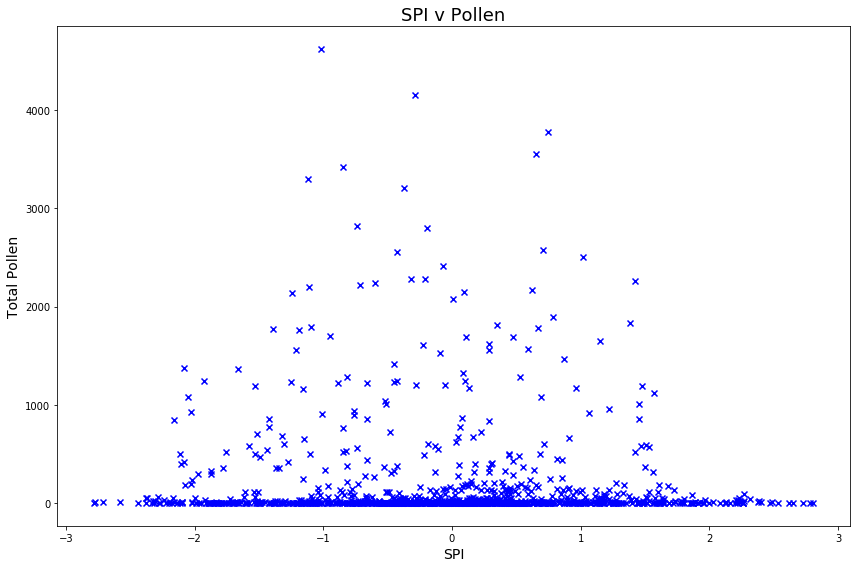

In [54]:
plt.figure(figsize=(12,8))
plt.title('SPI v Pollen', fontsize=18)
plt.xlabel('SPI', fontsize=14)
plt.ylabel('Total Pollen', fontsize=14)

# spi_neg = df3[df3 <0]
# dtgn = pd.to_datetime(df3_neg.index)
# df3_pos = df3[df3 >= 0]
# dtgp = pd.to_datetime(df3_pos.index)
xval = pollen_wx_df.SPI
yval = pollen_wx_df["total-pol"]

plt.scatter(xval,yval, marker='x', c='b')
plt.tight_layout()

#plt.savefig('./wind.pdf')
plt.show()


In [55]:
#  Write the combined file to another CSV to use in the ML notebook.

pollen_wx_df.to_csv("./pollen_wx_richmond.csv")
